Hi! My name is Mostafa Ebid.

The reason why i wanted to do my final project on **intent classification** and to go in depth in NLP is because i have alot of ideas of apps and websites that help people using AI, especially NLP. Therefore i wanted to learn about NLP to help create one of those apps in the near future.

# There are **two** main parts to my finaly project.


1.   **Creating a Multi-label intent classifier using the Naive Bayes algorithm** (one of the most accurate algorithms for such machine learning problems) - to help do this I used [the following tutorial.](https://towardsdatascience.com/multi-label-intent-classification-1cdd4859b93)

2.   Using open source library: **Rasa** to create an *epic* intent classifier

The problem with NB models is that they assume that each word/feature is independent of each other. NB models do not find the context and meaning of the sentence as a whole by using neighboring words/feature(unlike LSTM, BERT models).

This is part of why I want to use Rasa for intent classification, but, this is not only the reason why.

Rasa also allows you to identify entities in a text.

For example, if a user enters "Call Dave". The intent would be to "phone call someone" and the entity would be the contact "Dave". (NB models can not do entity classification)


Moreover, Rasa allows for much more things, like:


*   Taking actions to specific intents
*   Creating stories of question and answer steps
*   Customizing its classifier (called DIET) as you would like by (for example):

  *   choosing which pre-trained models, encoders, sparse features, etc.. to use
  *   changing the size of the pretrained model to be able to make models light-weight (which may be important if you are working on a small system like a raspberry pi)
  *   Turning on/off masking (which i will discuss later) 





# To define clear tasks for this project:


1.   Create an NB model and evaluate it on data
2.   Create an intent classifier using Rasa's DIET classifier (without the added chatbot features like taking actions to specific intents as i do not have time for that)
3.  Compare each of of the two techniques using same data and same evaluation metrics to find out which has the highest performance.



In [2]:
'''

In this block of code i am importing json for loading the data.json file and i am importing 
csv 

The data.json file contains multiple objects each of which is about a topic. in security

The variable a contains all the topic names.

What i want to do now is add each topic to title. After that i want to take various sentence starters when
asking for description, solution and code. Then i would want to append each topic name to the sentence starters.
This allows me to create examples to later train to predict what type of intent
(i.e. whether the text is aking for a description, solution or code) the user requires.

'''

import json
with open("/content/data.json",encoding='utf-8') as read_file:
        data = json.load(read_file)

#For parsing the Json
a=data['items']
#Declaration of lists
title=[]
ques=[]
sol=[]
code=[]
#For accessing the title from Json and storing it in the list.
for d in a:
  title.append((d['title']))
  print(f"A topic name: {d['title']}")

A topic name: Filename injection Path traversal
A topic name: XSS injection
A topic name: Command injection
A topic name: Cross site request forgery
A topic name: XXE injections
A topic name: X Path injections
A topic name: XML injection
A topic name: XSLT injections
A topic name: External DTD parsing
A topic name: LDAP injection
A topic name: SSI injections
A topic name: File upload injections
A topic name: Version management
A topic name: Verbose error messaging
A topic name: Debug enabeling
A topic name: Robots.txt
A topic name: Accessible non parsed dynamic scripts
A topic name: Include anti caching headers
A topic name: Include anti clickjacking headers
A topic name: Include X XSS
A topic name: Include X Content Type Options header
A topic name: Include Strict Transport Security header
A topic name: Sensitive information stored in cookies
A topic name: Client side state management
A topic name: Too verbose authentication
A topic name: Brute force password guessing
A topic name: De

In [3]:

for t in title:
	ques.append("What is "+ t + " ?")
	ques.append("What does "+ t + " mean ?")
	ques.append("Tell me something about "+ t + " ?")
	ques.append(t)
	ques.append("Explain " + t +" ?")
	ques.append("Elaborate " + t +" ?")
	ques.append("Can you tell me about " + t + " ?")
	ques.append("What do you know about " + t + " ?")
	ques.append("What can you tell me about " + t + " ?")
	ques.append("I want to know about XSS " + t )
	ques.append("Do you have information about " + t + " ?")
 
for t in title:
        sol.append("How to solve "+ t + " ?")
        sol.append("How to resolve "+ t + " ?")
        sol.append("How to mitigate "+ t + " ?")
        sol.append("Solution for "+ t)
        sol.append("Provide me some Solution for "+ t)
        sol.append("mitigation for "+ t)
        sol.append("How to stop "+ t + " ?")
        sol.append("How to defend "+ t + " ?")
        sol.append("How to get secured against "+ t + " ?")
        sol.append("Solution, "+t)

for t in title:
        code.append("Give me some sample code of "+ t )
        code.append("Code example for "+ t + " ?")
        code.append("Code of "+ t )
        code.append("code for " + t) 
        # up until here is how many sentence starters we had in our data before. 
        # below i am appending more sentence starters for the code-class to help balance the data interms of class examples
        code.append("i want the program code of "+ t)
        code.append("program code for "+ t)
        code.append("how to code "+ t)
        code.append("how to create a program to do "+ t + "?")
        # I am not including '?' purposefully in some of the data to help make the intent classifier more 
        # conversation friendly and therefore more accurate
        code.append("i want the program code of "+ t)
        code.append("how can i make a program to defend against"+ t)
        code.append("how can i make a program to protect against"+ t)
        code.append("how can i make a program on "+ t)
        # This above line I added after seeing that asking for code using the sentence starter
        # 'code for ' classifies the text as a solution query (which is false)
        # so line 31 will enable the Naive Bayes algorithm to learn that sentence starter is used when asking for 
        # code which will help impore the model's accuracy
        # Also the lower cased 'c' and upper cased 'c' in code does not matter as the count vectorizer (used later) lower cases
        # all the tokens (words) before creating a vocabulary of the text.

print("Some intent = 'question' examples: \n")
for i in ques[:10]:
  print(i)
print("\n---------------------------------------------\n")

print("Some intent = 'solution' examples: \n")
for i in sol[:10]:
  print(i)
print("\n---------------------------------------------\n")

print("Some intent = 'question' examples: \n")
for i in code[:10]:
  print(i)

Some intent = 'question' examples: 

What is Filename injection Path traversal ?
What does Filename injection Path traversal mean ?
Tell me something about Filename injection Path traversal ?
Filename injection Path traversal
Explain Filename injection Path traversal ?
Elaborate Filename injection Path traversal ?
Can you tell me about Filename injection Path traversal ?
What do you know about Filename injection Path traversal ?
What can you tell me about Filename injection Path traversal ?
I want to know about XSS Filename injection Path traversal

---------------------------------------------

Some intent = 'solution' examples: 

How to solve Filename injection Path traversal ?
How to resolve Filename injection Path traversal ?
How to mitigate Filename injection Path traversal ?
Solution for Filename injection Path traversal
Provide me some Solution for Filename injection Path traversal
mitigation for Filename injection Path traversal
How to stop Filename injection Path traversal ?
H

In [4]:
"""
	Here we are creating a csv file and writing onto it the examples which we assembled previously as well as their
	labeled classes.
"""

file=open("intent_data.csv","x") # "x" means that a file is created

file.write('class,question\n') # creates the label and the example column

# Wrting all the description-class examples and their label (description) into the intent_datacsv
for x in ques:
		x=x.replace(",","") 
		# Here we are removing commas in the examples
		# as commas are specically used to create new columns and we don't want new columns to be created other
		# than between the label and the example (which we do in the below line)
		file.write('Description, '+x+"\n")
	
# Wrting all the solution-class examples and their label (solution) into the intent_data.csv
for y in sol:
		y=y.replace(",","")
		file.write('Solution, '+y+"\n")

# Wrting all the code-class examples and their label (code) into the intent_data.csv
for z in code:
		z=z.replace(",","")
		file.write('Code, '+z+"\n")

file.close() # completes the creation of the intent_data.csv file

In [5]:
import pandas as pd 
# the library which we will use in data processing

from sklearn.model_selection import train_test_split
# we will use this to split our data to train and test parts to check for generalization of our data by predict
# using test data

from sklearn.feature_extraction.text import CountVectorizer
# we will use this to turn our text examples into numerical arrays where each value represents the count of 
# a word in the vocabulary of our data in a certain sentence in our data

from sklearn.feature_extraction.text import TfidfTransformer
# we will use this to turn our numerical arrays containting word counts into a numerical matrix where each value represents the importance
# of a word in the vocabulary of our data in a certain sentence in our data

from sklearn.naive_bayes import MultinomialNB
# This is the naives bayes algorithm model which we will use to train our data for classification
# We are using this as it is one of the most accurate models for multi-label classification

from sklearn.metrics import classification_report
# This will allow us to get precision, recall and f1 score to access the performance of our Naive Bayes model
# in predicting the test data

In [6]:
"""
  We will create 4 functions for this classfication project:
   - get_data(): a function to get the dataframe of our data

   - data_prepare(): a function to do preprocessing:
       - remove null values in our data
       - turn label column (called "class") into numerical values
         so that we can pass it into the Naive Bayes model for training
   
   - naive_algo(): a function to create the naive bayes model and train it on our data
  
   - predict(): a function for predicting any text example by passing the text
     into the function
"""

def get_data():
  """
    Turns the intent_data.csv file into a dataframe
  """
  df = pd.read_csv("/content/intent_data.csv")
  return df

def data_prepare():
  y = get_data()
  y = y[pd.notnull(y['question'])] 
  # makes sure that there are not any null values in our data 
  # by removing any of them

  y.columns = ['classes', 'question'] 
  # changes the name of the 'class' column into 'classes' -- not very important but
  # just better name for the column

  y['category_id'] = y['classes'].factorize()[0]
  # creates a new label column (called "category_id'") which contains
  # the numerical-value-representation of our label column ('classes')
  # This is need to be able to pass our label column into the Naive Bayes model
  # for training


  category_id_df = y[['classes', 'category_id']].drop_duplicates().sort_values('category_id')
  category_to_id = dict(category_id_df.values)
  id_to_category = dict(category_id_df[['category_id', 'classes']].values)
  # The above three lines create a dictionary containing:
  #   key = class-name
  #   value = numerical label (in the created 'category_id' column) of the class
  # we are doing this to be able to index our data in the dataframe later easily

  return y, id_to_category

In [7]:
def naive_algo():

  df, id_to_category = data_prepare()
  # Here we are getting the dataframe that contains our data as well as the dictionary containing
  # the index to class name of our labels

  X_train, X_test, y_train, y_test = train_test_split(df['question'].values, df['category_id'].values, random_state = 0)
  # Here we are splitting our data into two sections: Training and Testing section
  # This will allow us to determine if our model generalizes well by predicting on our test data after training using
  # our training data

  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform(X_train)
  # The CountVectorizer() creates a matrix where each column represents a word and each row represents each sentence in our data
  # The values in the matrix are the count of the word (with the index of the column) in the sentence (with the index of the row)

  tfid_transformer = TfidfTransformer()
  X_train_tfidf = tfid_transformer.fit_transform(X_train_counts)
  # The X_train_tfidf matrix has the same structure interms of column and row meaning
  # however each value in the X_train_tfidf matrix represents the importance column-indexed word in
  # the specific row-indexed sentence

  clf = MultinomialNB().fit(X_train_tfidf, y_train)
  # Here we create our Naive Bayes model and immediately fit it using our preprocessed training data 

  return clf, count_vect, X_test, y_test, df, id_to_category 
  # we return the test and training data as we will need them when predicting classes for new examples and to 
  # access the performance of the naive bayes model

def predict(question):
  clf, count_vect, X_test, y_test, df, id_to_category  = naive_algo()
  # runs all previous functions resulting with our trained NB model

  intent = clf.predict(count_vect.transform([question]))
  # This uses our trained NB model to predict a given example text
  # We perform the operation count_vect.transform() on our to-be-predicted text as number values only can be passed
  # into our NB model

  intent = str(intent).strip("['']")
  # We remove any unneccessary empty list from our predicted intent to print out the intent neatly
  return intent

In [8]:
clf, count_vect, X_test, y_test, df, id_to_category = naive_algo()
# Gets our trained NB model

y_pred = clf.predict(count_vect.transform(X_test))
# We obtain predictions from applying our model onto test data

# We use our obtained predictions and the real label values to access performance and generalization of the model
print(classification_report(y_test, y_pred))
print("We see that the model has hight precision, recall and f1 score, indicating that the model has a high accuracy in predicting the class of a given text example.")



              precision    recall  f1-score   support

           0       1.00      0.93      0.96       694
           1       0.95      0.99      0.97       642
           2       0.97      1.00      0.98       760

    accuracy                           0.97      2096
   macro avg       0.97      0.97      0.97      2096
weighted avg       0.97      0.97      0.97      2096

We see that the model has hight precision, recall and f1 score, indicating that the model has a high accuracy in predicting the class of a given text example.


In [9]:

print(id_to_category[int(predict("i want the program code for XSS injection"))])
# We attempt to predict a text's question-type class
# And we predict it correctly



for i in range(3):
  print(f'\nPercentage of data classified with the intent of asking for a: {id_to_category[i]}')
  print(f"{round(((df['classes'].value_counts()[i])/(df['classes'].value_counts().sum()))*100, 2)}%")
  print("---------------------------------------------------------------")

print("\nOne problem with this model which i noticed about the data from the online tutorial that i used is that the percentage count\nof the description, solution, and code examples was not balanced (it was\n45% - description labeled\n42% - solution labeled\n16% - code labelled).\n\nSolving this could be through adding more sentence starters for solution-class examples and especially for\ncode-class example as code-class examples have the least percentage.\nI have done this exactly and now line 2 correctly identifies the text as a code-query instead of indentifying it as a description-query (which it was doing before).")

Code

Percentage of data classified with the intent of asking for a: Description
36.36%
---------------------------------------------------------------

Percentage of data classified with the intent of asking for a: Solution
33.33%
---------------------------------------------------------------

Percentage of data classified with the intent of asking for a: Code
30.3%
---------------------------------------------------------------

One problem with this model which i noticed about the data from the online tutorial that i used is that the percentage count
of the description, solution, and code examples was not balanced (it was
45% - description labeled
42% - solution labeled
16% - code labelled).

Solving this could be through adding more sentence starters for solution-class examples and especially for
code-class example as code-class examples have the least percentage.
I have done this exactly and now line 2 correctly identifies the text as a code-query instead of indentifying it as a 

**Another problem** i had was not understanding why we do not apply the TfidfTransformer on test data. After referring to a stackoverflow question. 

The reason is because we would introduce data leakage as importances of our X_train data would be known as we predict the labels of X_data. This would cause results to be too optimistic and would cause the mode to **over fit** and not generalize to new examples.

[Here](https://towardsdatascience.com/multi-label-intent-classification-1cdd4859b93) is the tutorial which I used to help make the first part of my final project

# First task has been cleared.

In [10]:
# Rasa is not initially installed in colab so in the following line we install it. We also instal Spacy library
# which is used in conjunction with Rasa to creat NLP models, tokenizers, feature extractors to add to the model's
# pipeline.
# We install sklearn_crfsuite as it contains the ner_crf component which we want to add to our model's pipeline
# Lastly we download en_core_web_sm. this represents the english language and we use it to get models that are
# trained on english-langauge text
!pip install rasa_nlu
!pip install -U spacy
!pip install sklearn_crfsuite
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 147 kB 7.9 MB/s 
     |████████████████████████████████| 132 kB 53.2 MB/s 
     |████████████████████████████████| 5.1 MB 70.5 MB/s 
     |████████████████████████████████| 130 kB 54.7 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 12.8 MB 21.7 MB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 5.4 MB 36.1 MB/s 
     |████████████████████████████████| 654 kB 41.0 MB/s 
     |████████████████████████████████| 829 kB 49.6 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 9.0 MB 15.9 MB/s 
     |████████████████████████████████| 139 kB 57.9 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 3.1 MB 51.1 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.8 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 18.0
    Uninstalling packaging-18.0:
      Successfully uninstalled packaging-18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa-nlu 0.15.1 requires packaging~=18.0, but you have packaging 21.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
arviz 0.12.1 requires matplotlib>=3.0, but you have matplotlib 2.2.5 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 7.7 MB/s 
2022-08-01 01:31:28.992720: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 7.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
# Load the Packages
from rasa_nlu.training_data  import load_data 
# we get the function which we will use to store the our json data file in a variable
from rasa_nlu.model import Trainer 
# This is the object whil we will:
#   1 - input to our pipeline/model settings
#   2 - train on our training data
from rasa_nlu import config
# we will use this to load the settings of our model (including the model pipeline) into our Trainer for training

In [12]:
from rasa_nlu import training_data
# Loading DataSet
train_data = load_data('/content/rasa-dataset.json')


ValueError: ignored

In [ ]:
# Config Backend using Sklearn and Spacy
trainer = Trainer(config.load("config_spacy.yaml"))

In [ ]:
# Training Data
trainer.train(train_data)

In [ ]:
# Returns the directory the model is stored in (Creat a folder to store model in)
model_directory = trainer.persist('./')

print(model_directory)

In [ ]:
from rasa_nlu.model import Interpreter

# where `model_directory points to the folder the model is persisted in
interpreter = Interpreter.load(model_directory)

In [ ]:
interpreter.parse(u"Good morning World") 
# we are predicting the intent of an unseen text example using our trained rasa model


# As you can see the model correctly identified the intent, however, it is incredibly close to getting it mixed up
# with the 'restaurant_search' intent. This is due to problems in the model



# Firstly, we barely gave the model any training data (exactly 42 examples) so the model does not have a variety
# text-intent examples to be able to generalize well to new data.

Other problems faced during task 2:

- I tried many times to find some way to divide the data into train and test parts in python, however, Rasa is mostly used in the command line and so each way i found is some command to run on the command line

- Moreover, i tried to implement the DIET classifier in this RASA model, however each time i get the pipeline from RASA website and paste it into config.yaml file, i get an error saying 'component no found'.

- Also i cannot find a function tht creates a confusion matrix to evaluate the RASA model as all of what i find is a command line command (similar to problem 1)

To solve this problem I decided to do the machine learning in the terminal and I learnt the commands which i need to do this:

First we initialize our rasa project through:



```
rasa init
```

then we edit the nlu.yml file in the data folder in our created rasa project to type in our training data.

The format inwhich we should enter the data is as follows:


```
#intent: intent name
  exmples: |
    - first example of text which would be classified in   the above intent name
    -
    -
    -
    -
```
and we repeat the above for each intent we have to classify

Moreover, I would like to perform entity classification as well onto the data, so we need to label the entities and give them a name.

We do this by:

putting the entity text in [] and then immediately after the square brackets we have the type of entity this is in () parenthesis

e.g.:



```
   - I want to learn about [css](programming language) please
```

After this we go to the config.yml file in our project to set up our pipeline and set the language of our data.



```
language: 'en'

pipeline: supervised_embeddings

```
Here, we are using supervised_embeddings pipeline as it would train our data and learn from it from scratch (without using pretrained embeddings) 

This is optimal because the dataset which i will be using to train this model is big (as it is the first dataset from NB not the rasa_dataset that we recently used).

This would allow the model to learn the security specifc terms in our data better and become more accurate.


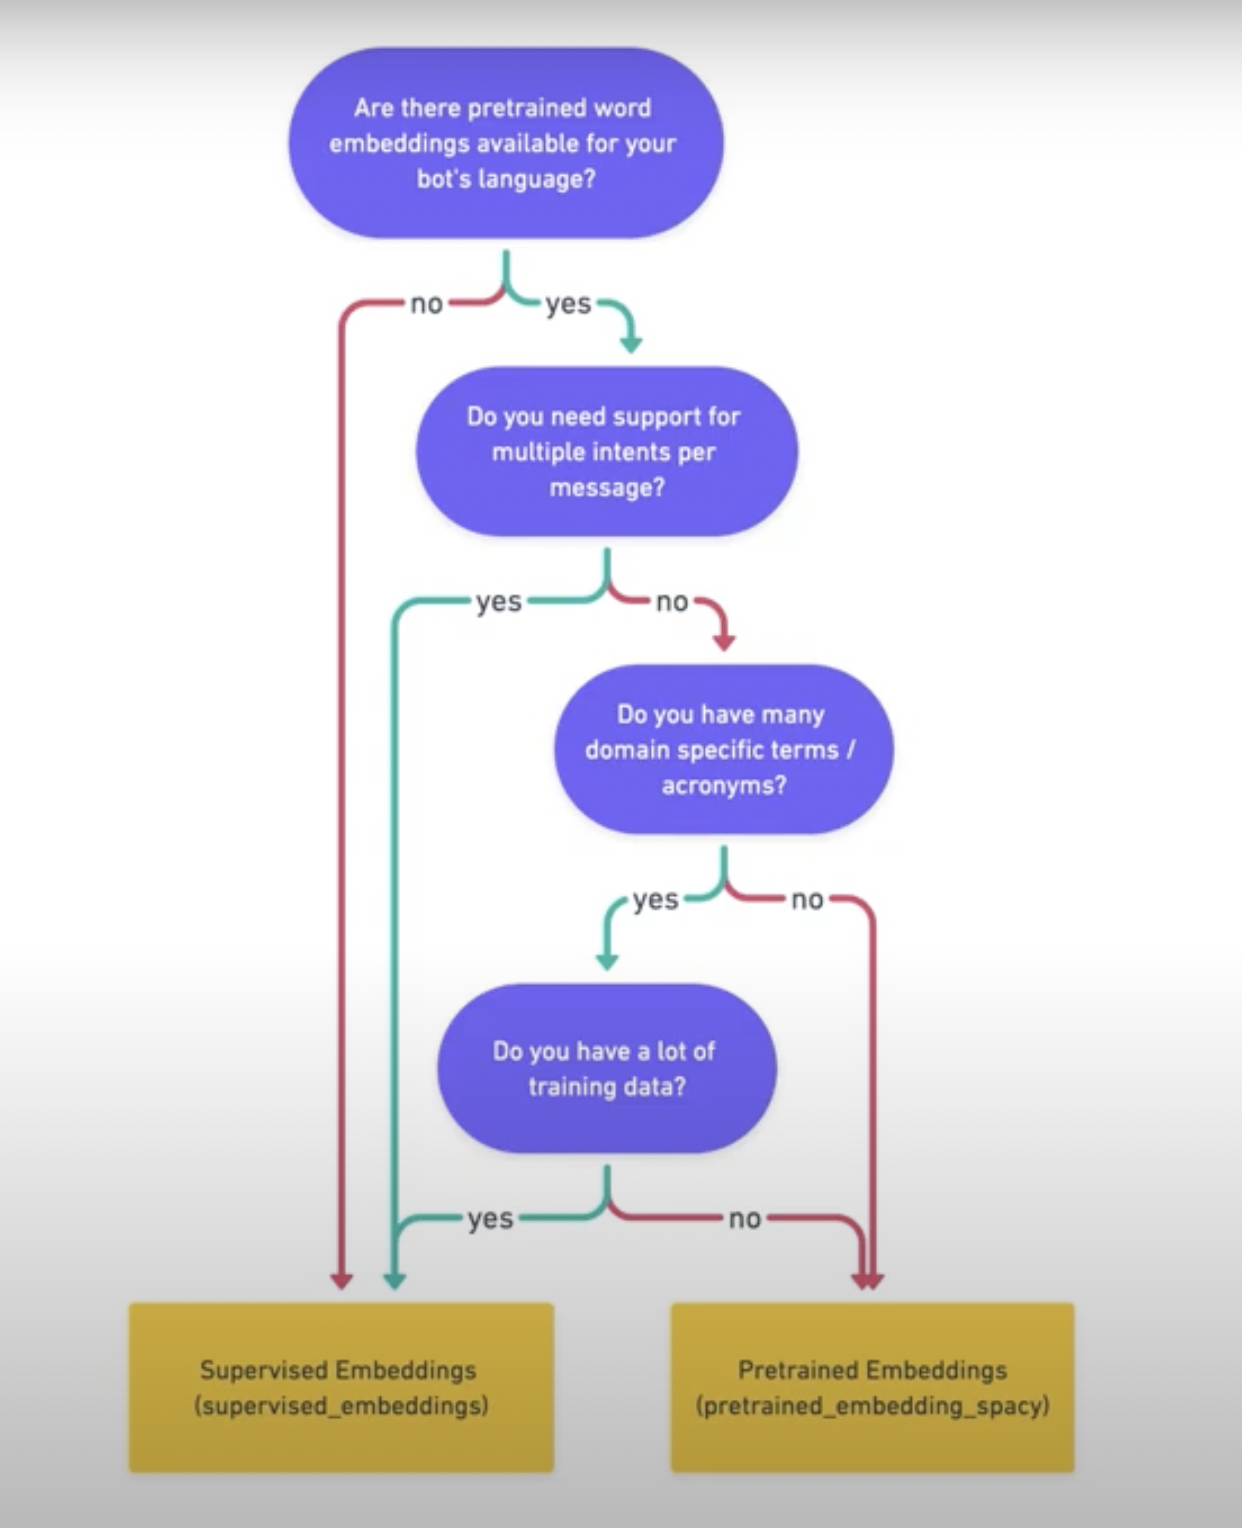

After this, we run:



```
rasa data split nlu
```

to split our data into training and testing data.

Then we run:

```
  rasa test nlu
    --nlu train_test_split/test_data.yml
```

to run the trained model on our test data and output precisio, recall, f1 scores to understabd the performance of our model.

This will help us find out whether using rasa imporved accuracy and other metrics compared to using the Naives Bayes model which we used i the beggining of the project.


However, I am facing a problem, discussed in [this post](https://forum.rasa.com/t/apple-m1-illegal-hardware-instruction-using-any-rasa-command/37946/40), which is that:

each time i run:

```
rasa train
```

or any other rasa command, i get the error:

illegal hardware instruction using ... (the command).

This (i found out) is because i am runnung the command on the M1 Macbook, which uses a version of tensorflow (and other libraries) which rasa does not currently support.

I have tried [this](https://forum.rasa.com/t/an-unofficial-guide-to-installing-rasa-on-an-m1-macbook/51342) guide to fix the problem, which involves running many command (installing various libraries, and conda to use to process rasa commands) however, it has not fixed my issue.

After more hours of searching for how to fix this issue, I found out that I could download a windows virtual machine on my laptop and use it to train the rasa model. 

Therefore this is what i have done. I used an app called Parallel Desktop to download windows on my mac (for a limited trial of some days). 

This allowed me to run the above commands while they work. (however, before this i had to install python and pip onto my virtual machine, also, for some reason i had to start each ove the above commands with:

 - python -m 

 for them to work.

 # Note: 

when editing config.yml in the virtual machine and setting pipeline: supervised_embeddings, i got an error saying that supervised_embeddings should be a list, so I went onto rasa and copy pasted the components for the supervised_embeddings pipeline, these are:

 pipeline:
  - name: WhitespaceTokenizer
  - name: RegexFeaturizer
  - name: LexicalSyntacticFeaturizer
  - name: CountVectorsFeaturizer
  - name: CountVectorsFeaturizer
    analyzer: "char_wb"
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100

and (thankfully) it worked this time.

# Another note

After doing:

python -m rasa data split nlu

i took the now-created training_data.yml fil and replaced it with the previous full training data file nlu.yml, so that now i can run

python -m rasa train nlu

and train only on the training data, as in a now-created tests file, there would be the testing data (being approx. 20% of the full data)

# An additional note

The data i used is the data from the Naive Bayes model tutorial. To prepare the data i hand coded the intent and examples through copy pasting of the examples in the required format. I know that this is not the most efficient way, but after spending a lot of time searching for an effient way with no result i decided to hand code the data file.

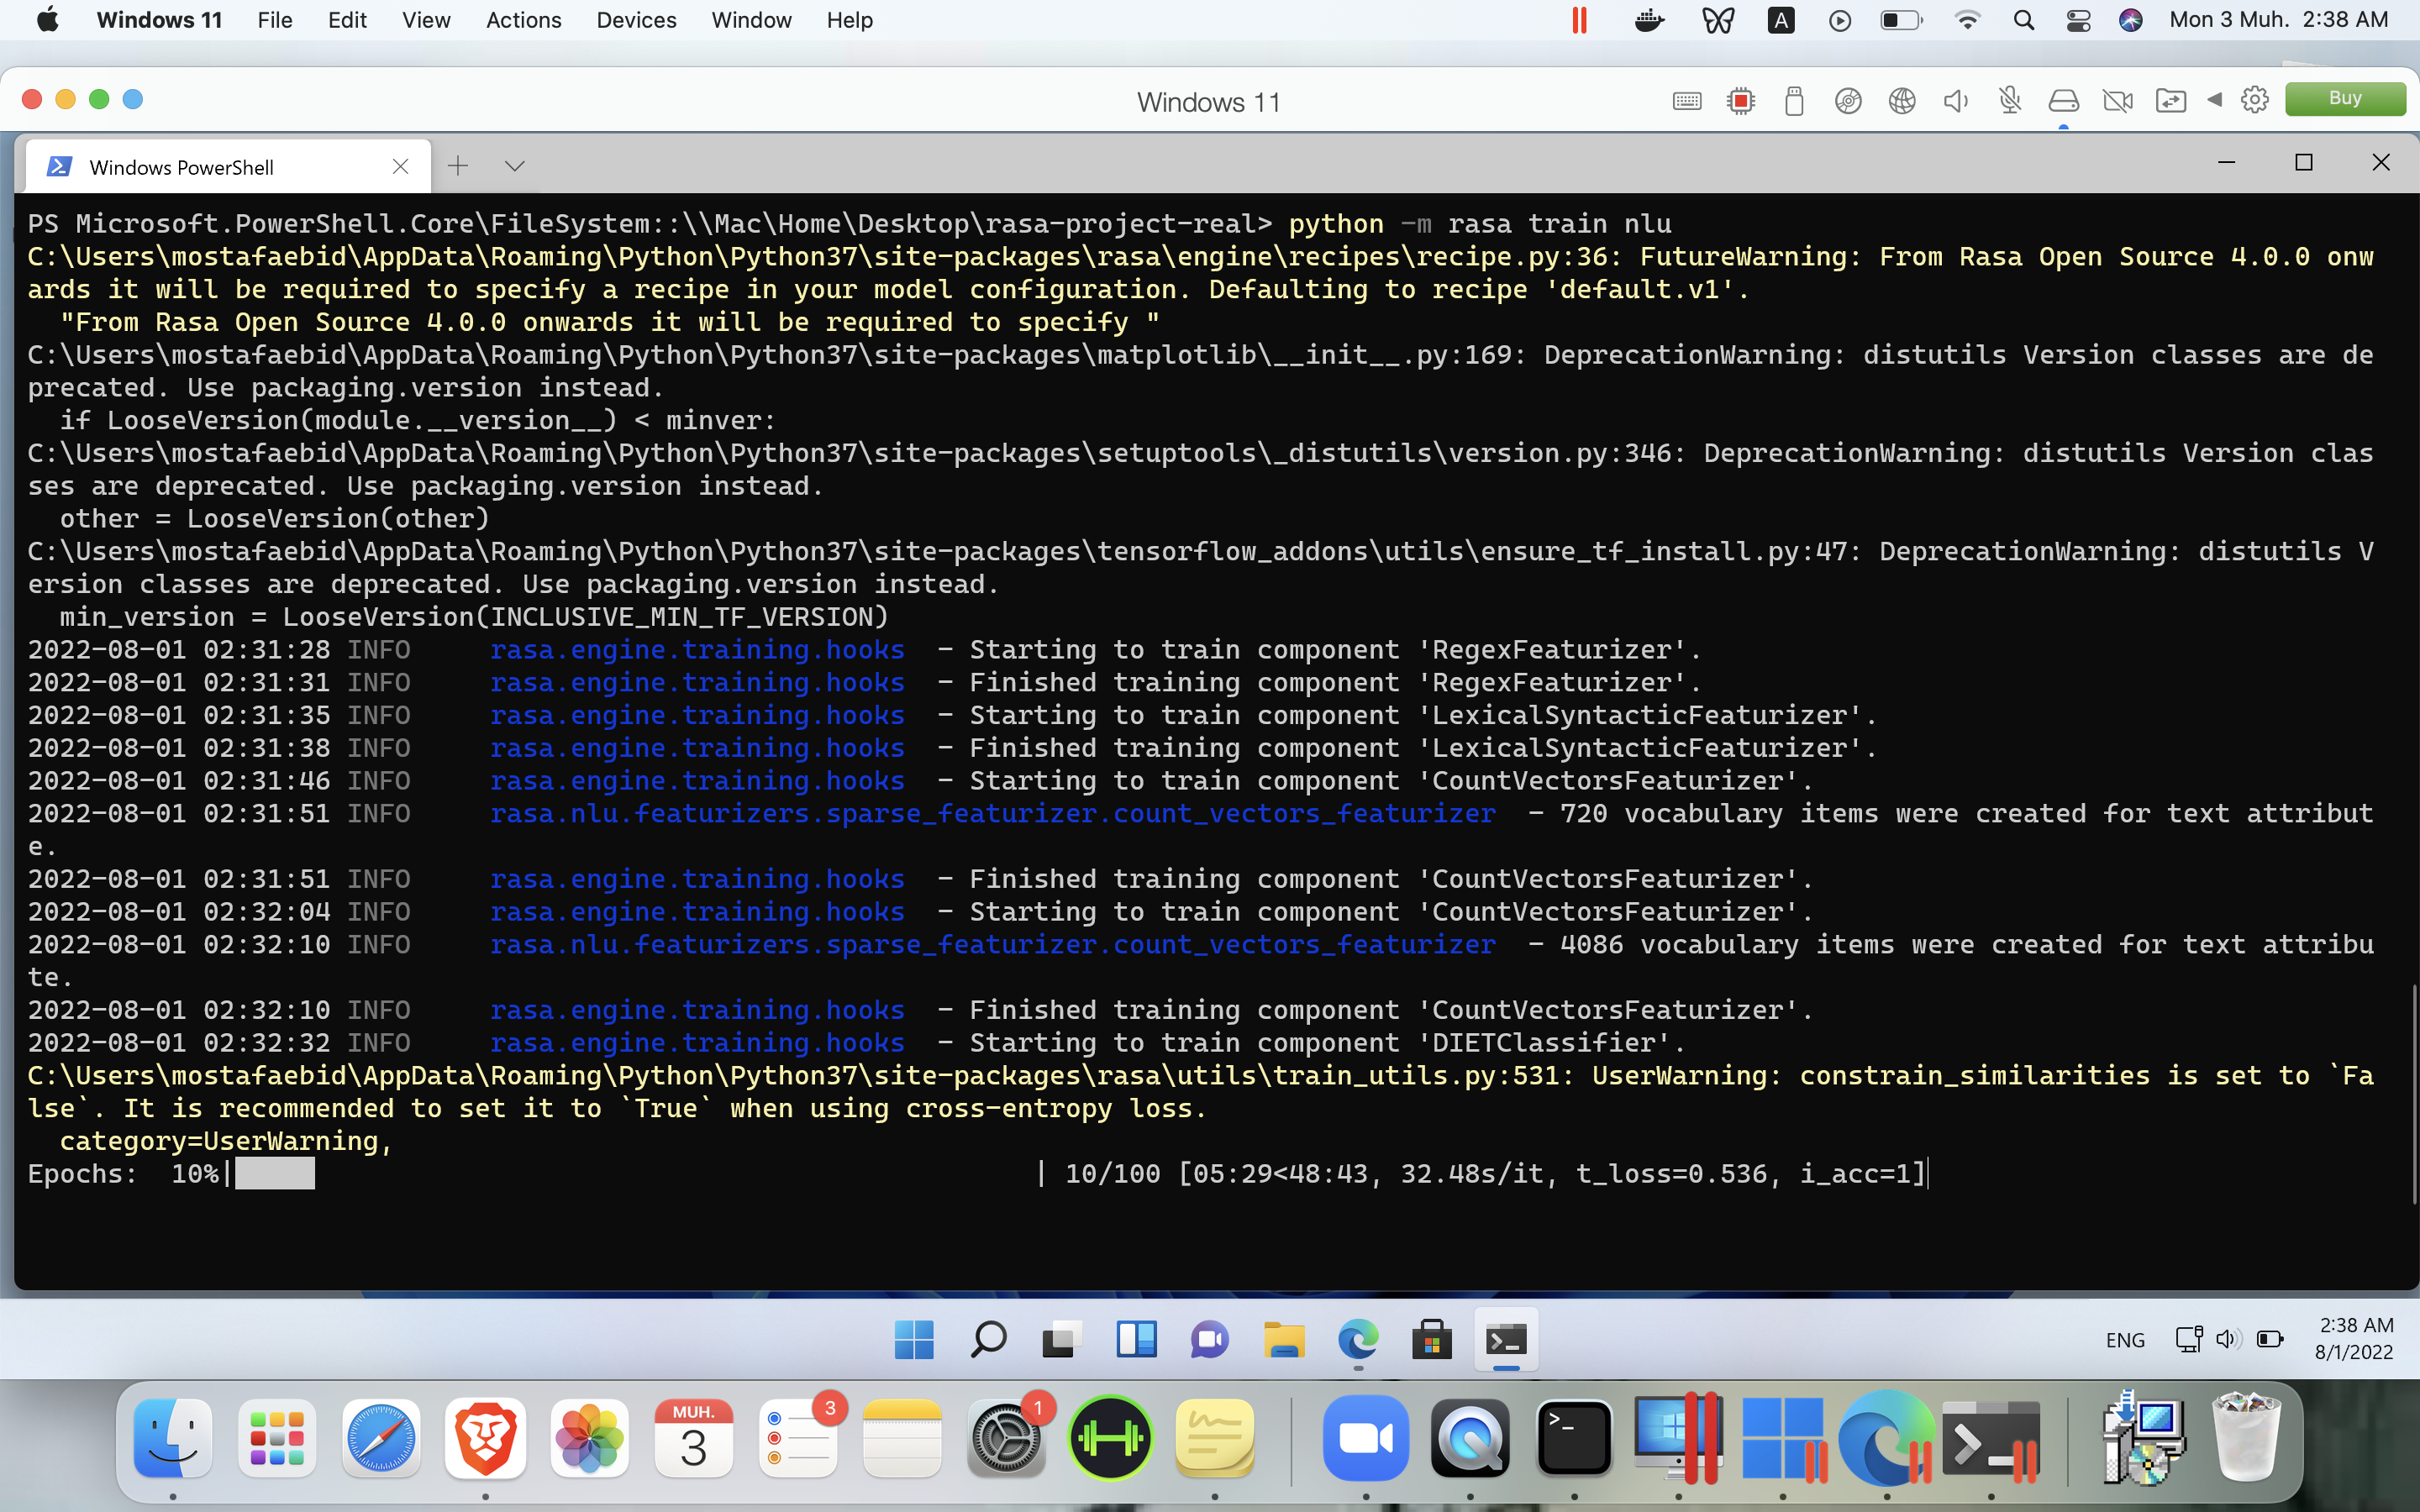

The above image shows the DIET classifier being trained on the training data.

It is important to mention that using Parallel Desktop to run the rasa model leads to no usage of the M1 apple chip, so the power of the M1 chip and speed that it has is not being used as i train the model. This is why it is taking a very long time for it to finish training.

This is why i decided to decrease the epochs from 100 to 30, to decrease time waiting for model to finish training (100 epochs would take 2 + hours). Also, i noticed the accuracy was already very high by 30 epochs (it was 1) so it is likely that the next epochs will not greatly affect the accuracy, loss of the model.

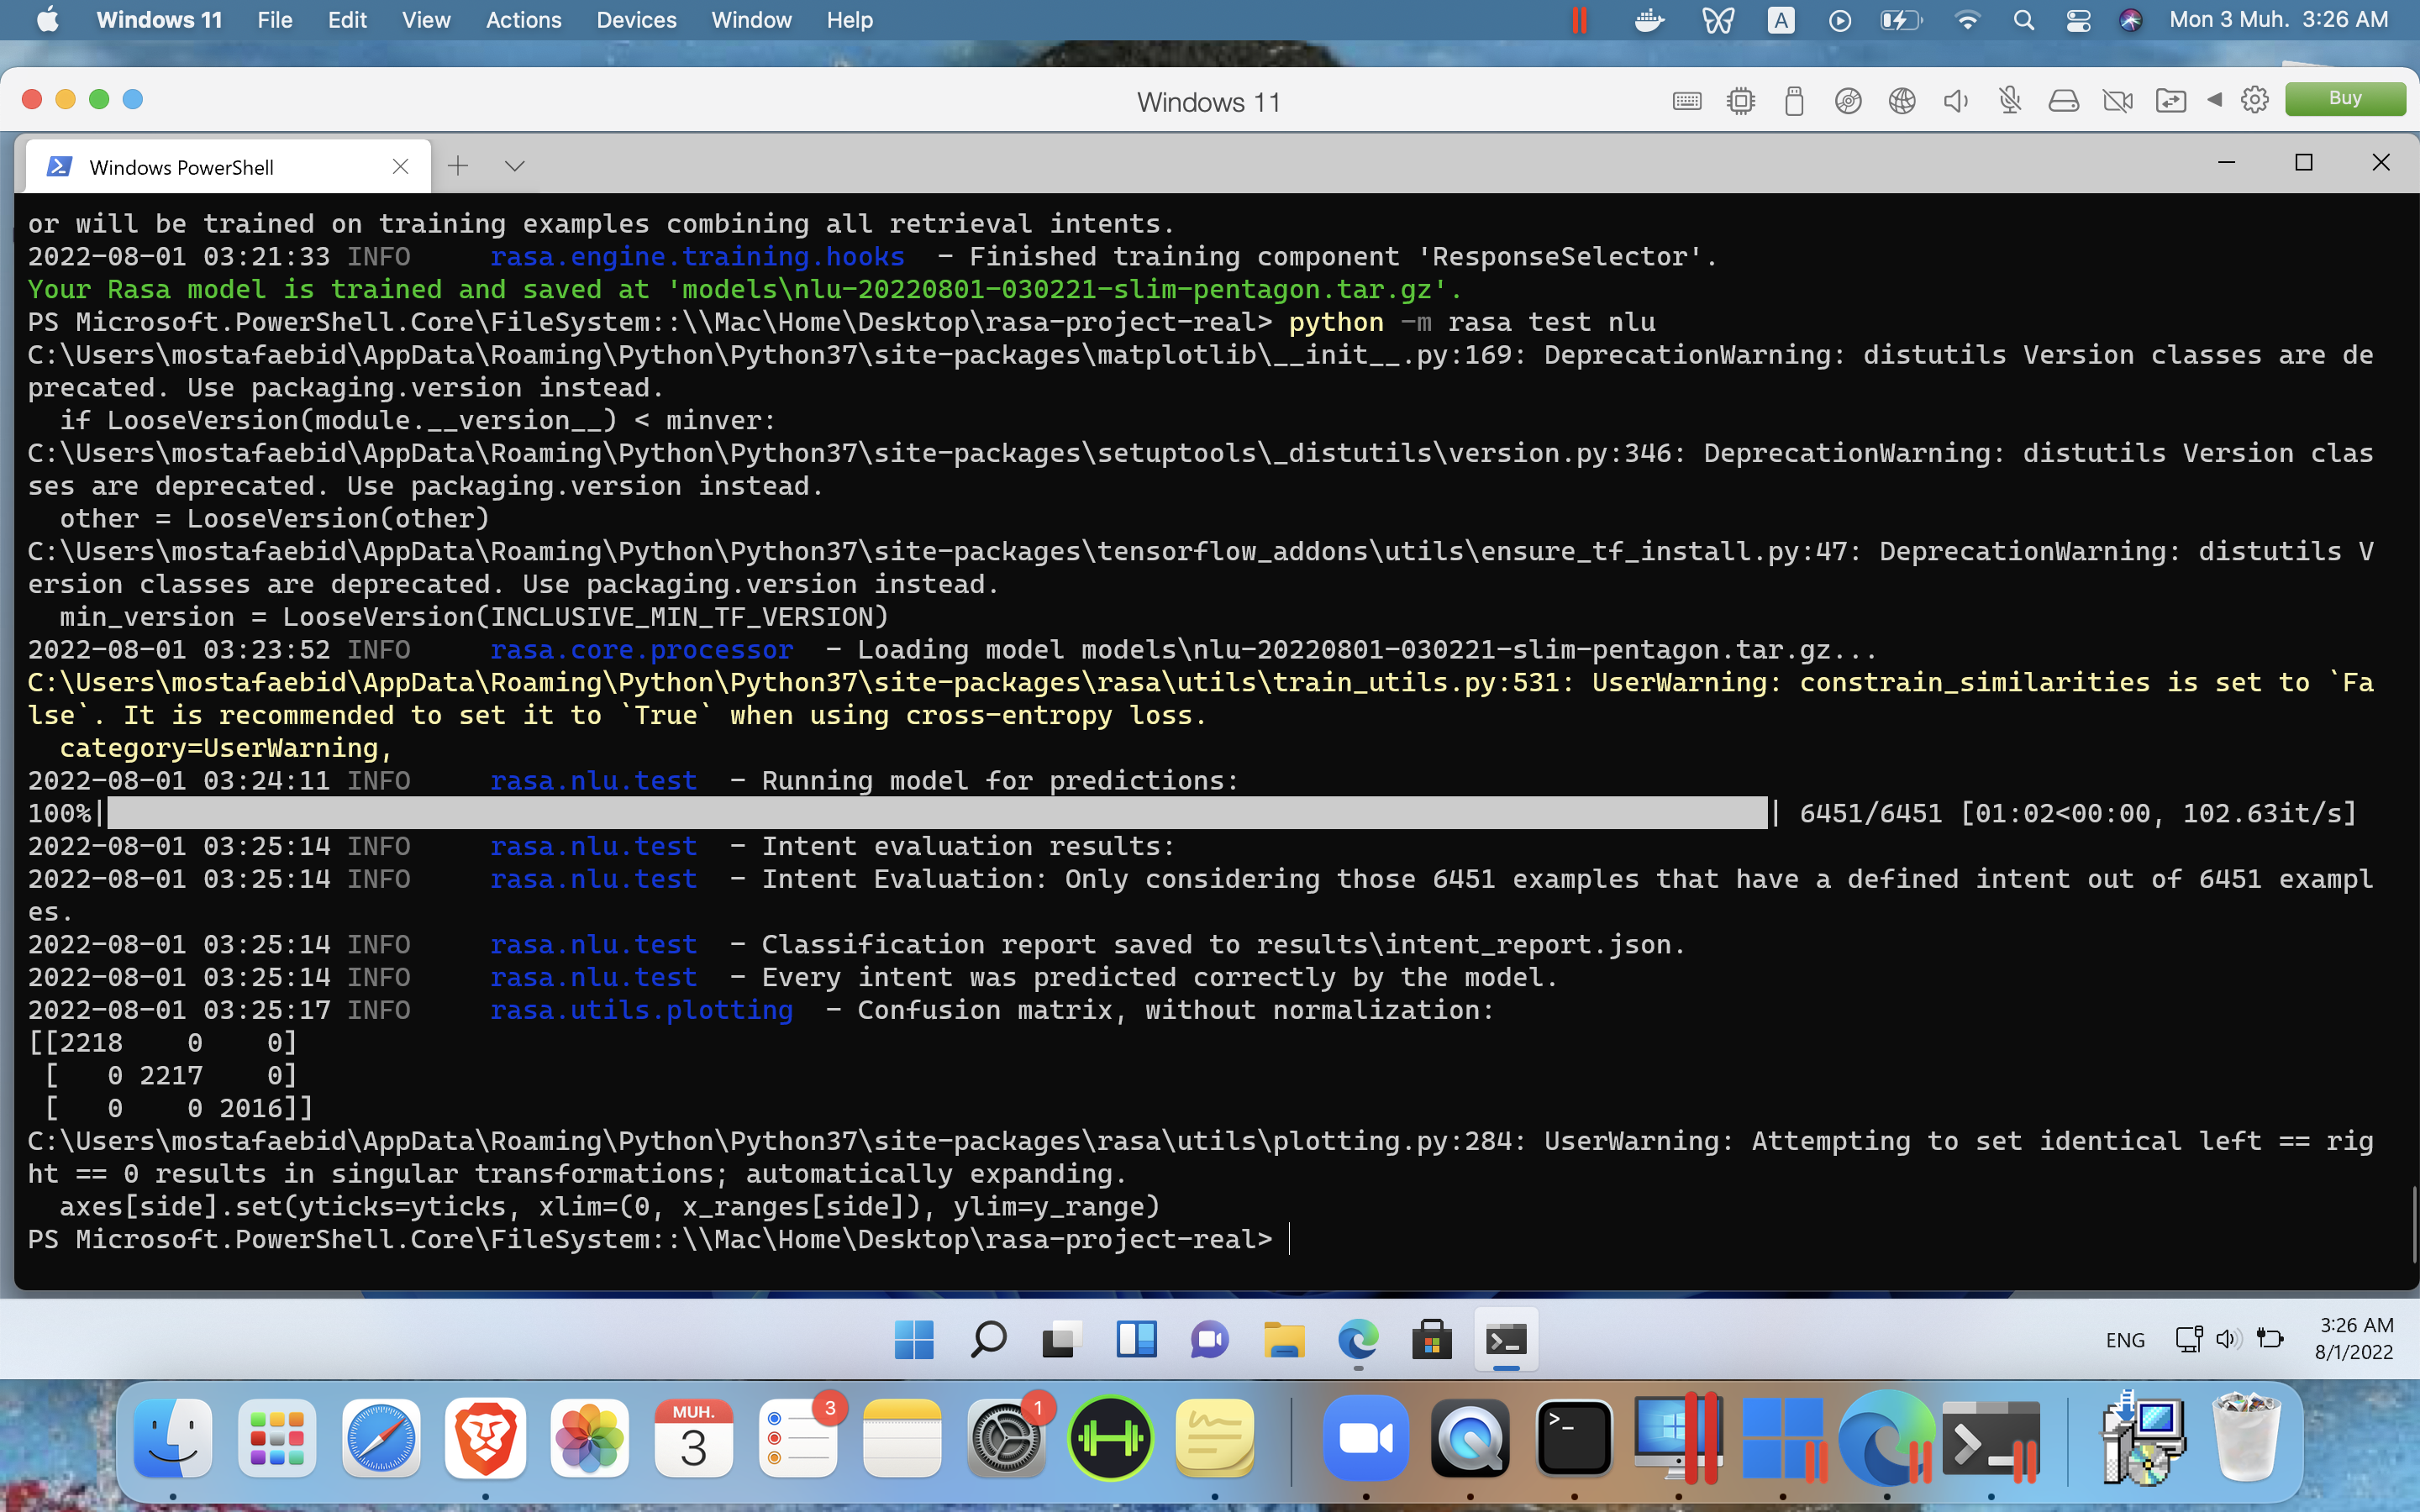

The above image shows the results after the model has been trained and tested (by running: python -m rasa test nlu).

As you can see, every example in the test data has been predicted correctly. The DIET classifier model has recieved 100% recall, precision as there were no false positives nor false negatives.

Compared to the 97% precison, 100% recall, 98% F1 value, the DIET classifier model has outperformed the Naive Bayes model.

Therefore, I announce **the completion of tasks 2 and 3**.

The answer to task 3 is that:

- **The rasa DIET classifier is more accurate in intent classification than the Naive Bayes model based on our data and performance evalution metrics.**

Thank you for reading and following with me.

Made by Mostafa Ebid